## Wyznaczanie liczby $\pi$ metodą Monte Carlo

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def monte_carlo_pi(n_points: int = 10000, *, visualisation: bool = False) -> float:
    # Generating needed number of points from uniform distribution
    points = np.random.uniform(low=-1, high=1, size=(n_points, 2))
    # Checking which points are inside the circle
    is_inside = np.sqrt(np.sum(points**2, axis=1)) <= 1
    inside_points = points[is_inside]
    outside_points = points[~is_inside]
    # Actual calculation
    pi = 4 * np.sum(is_inside) / n_points
    # Visualizing what is being calculated
    if visualisation:
        plt.figure(figsize=(6, 6))
        plt.scatter(inside_points[:, 0], inside_points[:, 1], s=5, color='g')
        plt.scatter(outside_points[:, 0], outside_points[:, 1], s=5, color='r')
        circle1 = plt.Circle((0, 0), 1, alpha=0.15, lw=2, color='b')
        plt.gca().add_patch(circle1)
        plt.axis('equal')
        plt.title(f'Estimating Pi using the Monte Carlo Method (N points = {n_points}), result={pi}')
        plt.show()
    # Return result
    return pi



Trying 10 points!


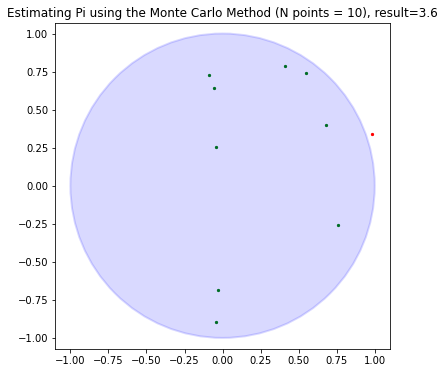

Result for 10 points is 3.60000
Trying 100 points!


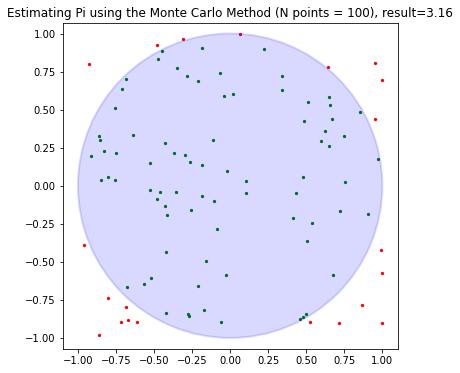

Result for 100 points is 3.16000
Trying 1000 points!


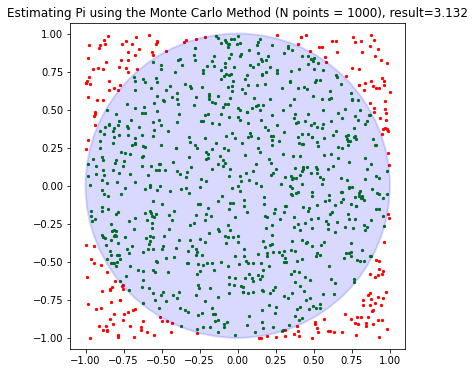

Result for 1000 points is 3.13200
Trying 10000 points!


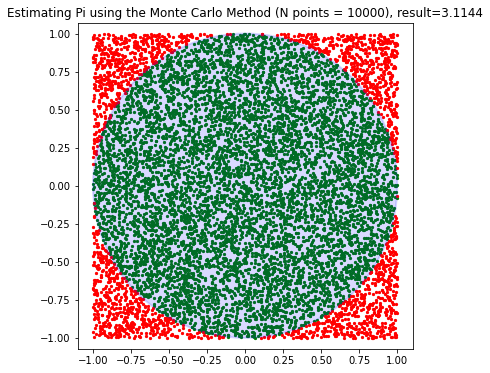

Result for 10000 points is 3.11440
Trying 100000 points!


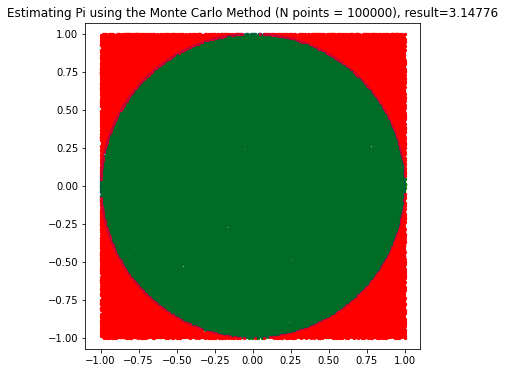

Result for 100000 points is 3.14776


In [16]:
for i in range(1, 6):
    n_points = 10**i
    print(f'Trying {n_points} points!')
    print(f'Result for {n_points} points is {monte_carlo_pi(n_points, visualisation=True):.5f}')

In [17]:
from typing import List, Tuple


def examinate_monte_carlo_pi(n_samples: int = 1000, n_points: int = 1000) -> Tuple[List[float], List[float], List[float]]:
    """Examinate monte carlo method to calculate Pi value.
    
    Runs `n_samples` tries on calculating Pi value for `n_points`. For Pi values calculates mean and std.

    Parameters
    ----------
    n_samples: int
        Number of samples (tries) to run.
    n_points: int
        Number of points to be randomly generated in every sample (try).
    
    Returns
    -------
    Tuple[List[float], List[float], List[float]]
        Tuple of three lists of floats, which are (in order): list of results, list of means, list of std's.
        List of results has as many results as there were samples.
        List of means contains means for sample, e.g. mean at index 10 was calculated from first 11 samples.
        List of std is built in the same manner as list of means.

    """
    sample_indeces = np.arange(n_samples)
    results = []
    means = []
    stds = []
    for i in sample_indeces:
        sample_res = monte_carlo_pi(n_points=n_points)
        results.append(sample_res)
        means.append(np.mean(results))
        stds.append(np.std(results))
    return results, means, stds
    



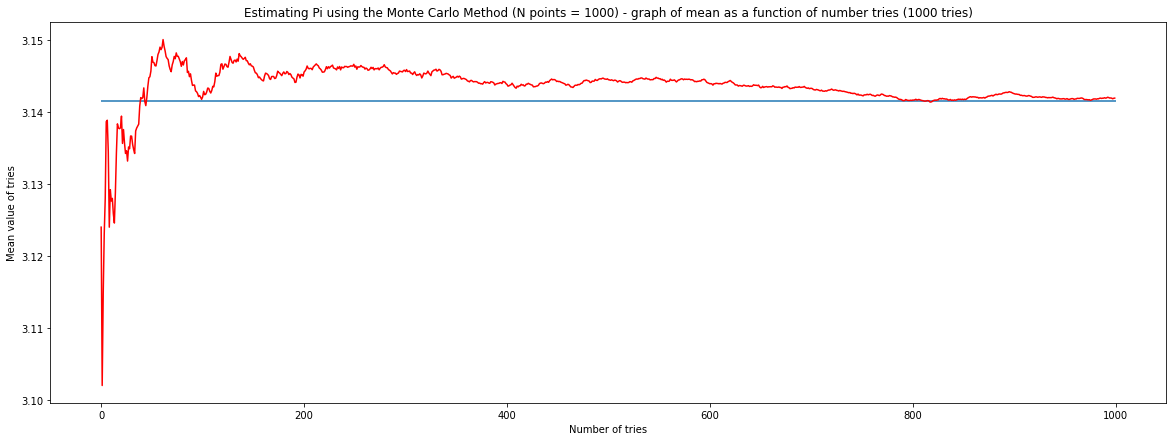

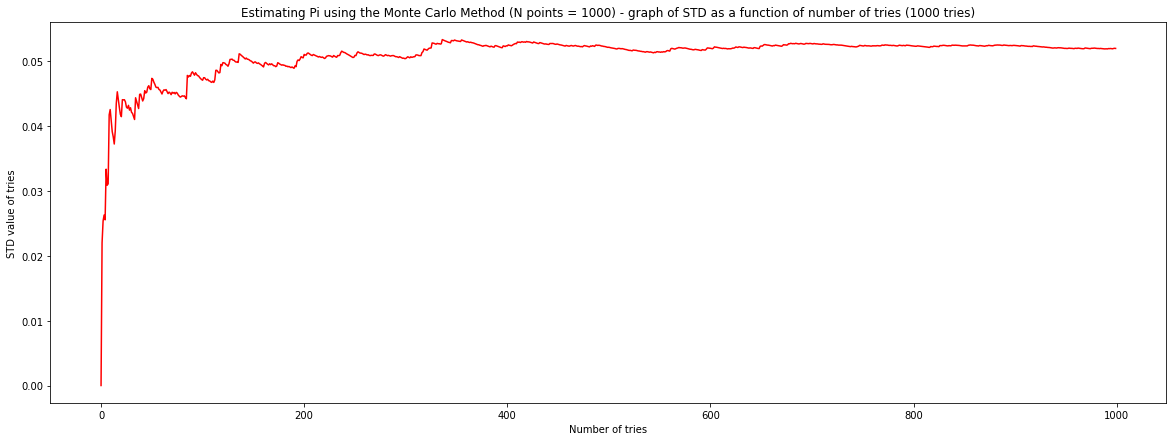

In [18]:
n_samples = 1000
n_points = 1000
results, means, stds = examinate_monte_carlo_pi(n_samples=n_samples, n_points=n_points)

# Visualizing what was calculated
# mean
plt.figure(figsize=(20, 7))
plt.plot(means, color='r')
plt.title(f'Estimating Pi using the Monte Carlo Method (N points = {n_points}) - graph of mean as a function of number tries ({n_samples} tries)')
plt.xlabel('Number of tries')
plt.ylabel('Mean value of tries')
plt.hlines(np.pi, xmin=0, xmax=n_samples)
plt.show()
# std
plt.figure(figsize=(20, 7))
plt.plot(stds, color='r')
plt.title(f'Estimating Pi using the Monte Carlo Method (N points = {n_points}) - graph of STD as a function of number of tries ({n_samples} tries)')
plt.xlabel('Number of tries')
plt.ylabel('STD value of tries')
plt.show()
